# WELCOME TO THE NOTEBOOK
------------------

### Importing the Modules

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kaito\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Importing the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


let's check the shape of the dataframe

In [3]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


(179108, 13)

let's select the needed columns for our project

In [4]:
cols_needed = ['user_name','date','text']
df = df[cols_needed]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


change the type of some columns

In [5]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date

df.date

0         2020-07-25
1         2020-07-25
2         2020-07-25
3         2020-07-25
4         2020-07-25
             ...    
179103    2020-08-29
179104    2020-08-29
179105    2020-08-29
179106    2020-08-29
179107    2020-08-29
Name: date, Length: 179108, dtype: object

### Picking out the tweet texts

In [6]:
txt = df['text']
txt

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

### Removing URLs from tweets

In [7]:
remove_url = lambda x: re.sub('https\S+','',str(x))
df['text'] = df['text'].apply(remove_url)

### Converting all tweets to lowercase

In [8]:
df['text'] = df['text'].apply(str.lower)
df['text']

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

### Removing punctuations

In [9]:
z = string.punctuation
mytable = str.maketrans('','',z)
# print(txt.translate(mytable))
df['text'] = df['text'].apply(lambda x: x.translate(mytable))
df['text']

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104               2020 the year of insanity lol covid19 
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

### Removing stopwords

In [10]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = stopwords.words('english')
stop_words = stop_words + more_words
# words = [w for w in x if w not in stop_words]

In [11]:
df['text'] = df['text'].apply(lambda x : ' '.join([w for w in word_tokenize(x) if w not in stop_words]))
df['text']

0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

### let's create a big list of words out of all the tweets 

In [19]:
txt = ' '.join(df['text'])
# txt[:500]

'smelled scent hand sanitizers today someone past would think intoxicated that… hey yankees yankeespr mlb wouldnt made sense players pay respects a… diane3443 wdunlap realdonaldtrump trump never claimed hoax claim effort to… brookbanktv one gift give appreciation simple things always around me… 25 july media bulletin novel coronavirusupdates kansalrohit69 drsyedsehrish airnewsalerts ani… deaths continue rise almost bad ever politicians businesses want… change work general recruiting specifically '

In [20]:
words = word_tokenize(txt)

In [21]:
words[:5]   

['smelled', 'scent', 'hand', 'sanitizers', 'today']

# WORDCLOUD of tweets

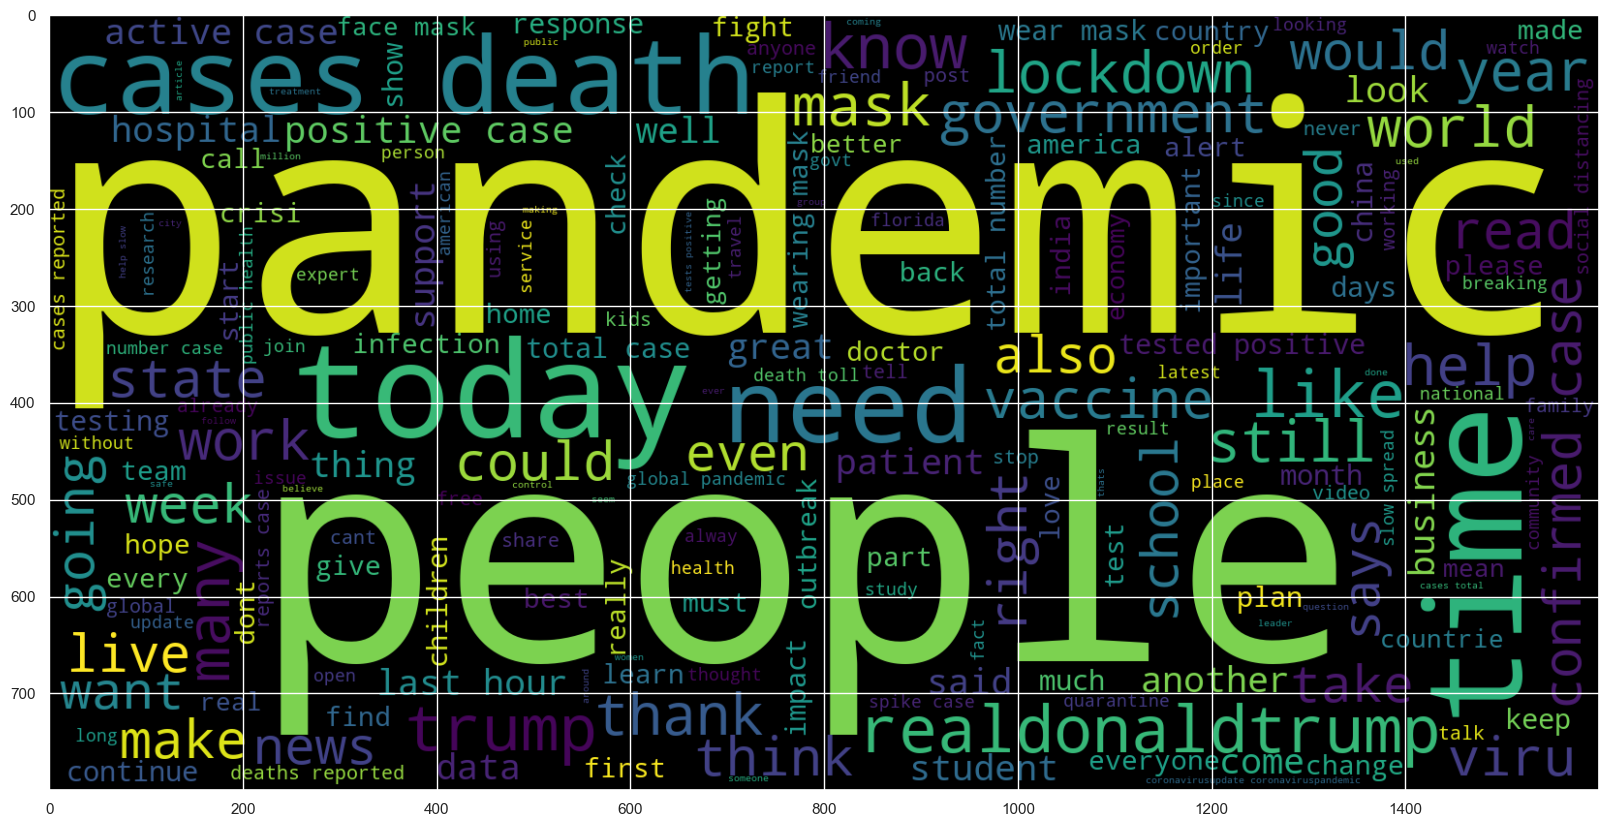

In [27]:
# Counter(words).most_common(10)
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 200 , width = 1600 , height = 800, min_word_length=4,stopwords=stop_words).generate(" ".join(df['text']))
plt.imshow(wc, interpolation = 'bilinear')

### put the Cleaned text in main dataframe

In [26]:
df['text']  # its cleaned

0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

# Sentiment Analysis 

Getting the polarity scores for each tweet

In [41]:
sid = SentimentIntensityAnalyzer()
scores = df['text'].apply(lambda x: sid.polarity_scores(x))

In [42]:
scores

0         {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1         {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2         {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
179104    {'neg': 0.435, 'neu': 0.235, 'pos': 0.329, 'co...
179105    {'neg': 0.25, 'neu': 0.556, 'pos': 0.194, 'com...
179106    {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [84]:
# TEST on list of dictionary in pd dataframe
pd.DataFrame(data=[{'neg': 0.0, 'neu': 0.588, 'pos': 0.412},{'neg': 0.11, 'neu': 0.709, 'pos': 0.181}])

,neg,neu,pos
0,0.00,0.588,0.412
1,0.11,0.709,0.181


In [43]:
# new df for scores
dummy_df = pd.DataFrame(data = list(scores))
dummy_df

,neg,neu,pos,compound
0,0.000,0.758,0.242,0.4939
1,0.110,0.709,0.181,0.2263
2,0.000,0.832,0.168,0.2057
3,0.000,0.563,0.437,0.7351
4,0.000,0.796,0.204,0.3182
...,...,...,...,...
179103,0.000,0.588,0.412,0.4939
179104,0.435,0.235,0.329,-0.2263
179105,0.250,0.556,0.194,-0.2023
179106,0.000,0.660,0.340,0.5574


### Labeling the scores based on the compound polarity value

In [59]:
# np.select function choices based on condition 
col         = 'compound'
conditions  = [ dummy_df[col] > 0, dummy_df[col] < 0,dummy_df[col]== 0]
choices     = [ "positive", 'negative', 'neutral' ]
dummy_df['label'] = np.select(conditions, choices, default=np.nan)

# dummy_df[dummy_df['Label'] == 'neutral']
dummy_df

,neg,neu,pos,compound,label
0,0.000,0.758,0.242,0.4939,positive
1,0.110,0.709,0.181,0.2263,positive
2,0.000,0.832,0.168,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.796,0.204,0.3182,positive
...,...,...,...,...,...
179103,0.000,0.588,0.412,0.4939,positive
179104,0.435,0.235,0.329,-0.2263,negative
179105,0.250,0.556,0.194,-0.2023,negative
179106,0.000,0.660,0.340,0.5574,positive


### let's join two dataframes

In [63]:
# add label column from dummy_df polarity dataframe to original df
df['label'] = dummy_df['label']
df.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positive
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive


### Plotting the sentiment score counts

### 1. Bar plot of label count

In [65]:
count_df = df['label'].value_counts().reset_index()

In [66]:
count_df

,index,label
0,positive,70303
1,neutral,62087
2,negative,46718


<AxesSubplot: xlabel='index', ylabel='label'>

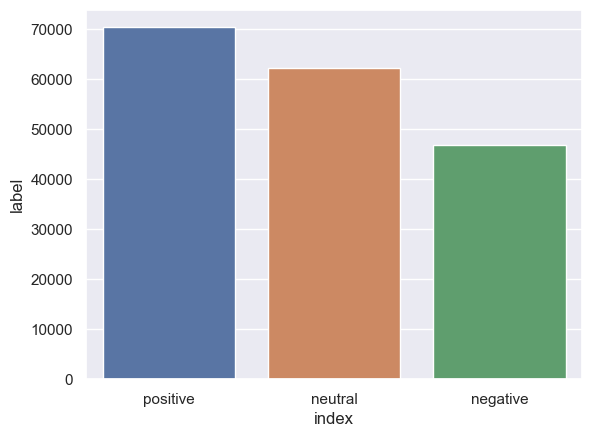

In [67]:
sns.barplot(x='index',y='label',data=count_df)

### 2. Line plot for label by date

In [73]:
df_plot = df.groupby(['date','label'])['user_name'].count().reset_index(name='User Count')

In [79]:
# sns.lineplot(data=df_plot,x='date',y='User Count',hue='label')
# using plotly seems better than seaborn
px.line(data_frame=df_plot,x='date',y='User Count',color='label',title='Daily tweets sentiment analysis')